# Проект по Эконометрике - 1

Выполнили:

Ягжов Иван Алексеевич

Литке Руслан Александрович

Родин Владимир Владимирович

### Импортируем библиотеки

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, kstest

### Загрузим данные и объединим их в единый датасет

In [83]:
df_main = pd.read_csv('avgIQpercountry.csv')
df_alch_main = pd.read_excel('alcohol.xlsx')

#### Рассмотрим датасет по потреблению алкоголя

In [84]:
df_alch_main

,Unnamed: 0,Unnamed: 1,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Afghanistan,All types,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.02
1,0,Beer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
2,0,Wine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,Spirits,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00
4,0,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
935,Zimbabwe,All types,3.11,3.10,3.82,3.76,3.84,4.22,4.11,3.93,3.91,3.38
936,0,Beer,1.20,1.20,1.93,1.93,1.93,2.23,2.12,2.07,2.05,1.67
937,0,Wine,0.05,0.04,0.05,0.05,0.06,0.06,0.05,0.05,0.05,0.06
938,0,Spirits,0.39,0.39,0.39,0.35,0.36,0.36,0.47,0.47,0.34,0.36


Переименуем столбцы.

In [85]:
df_alch_main.rename(columns={'Unnamed: 0': 'Country', 'Unnamed: 1': 'Alcohol'}, inplace=True)
df_alch_main

,Country,Alcohol,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Afghanistan,All types,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.02
1,0,Beer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
2,0,Wine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,Spirits,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00
4,0,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
935,Zimbabwe,All types,3.11,3.10,3.82,3.76,3.84,4.22,4.11,3.93,3.91,3.38
936,0,Beer,1.20,1.20,1.93,1.93,1.93,2.23,2.12,2.07,2.05,1.67
937,0,Wine,0.05,0.04,0.05,0.05,0.06,0.06,0.05,0.05,0.05,0.06
938,0,Spirits,0.39,0.39,0.39,0.35,0.36,0.36,0.47,0.47,0.34,0.36


Оставим в датасете только значения Alcohol: 'All types' и обновим индексацию.

In [86]:
df_alch = df_alch_main[df_alch_main['Alcohol'] == 'All types']
df_alch.reset_index(inplace=True)
df_alch.drop(columns=['index'], inplace=True)
df_alch

C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\3725605348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alch.drop(columns=['index'], inplace=True)


,Country,Alcohol,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,Afghanistan,All types,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.02
1,Albania,All types,4.40,4.44,4.39,4.38,4.33,4.10,4.28,4.43,5.03,4.88
2,Algeria,All types,0.59,0.59,0.58,0.58,0.55,0.54,0.50,0.43,0.40,0.35
3,Andorra,All types,10.99,10.72,11.18,11.18,11.02,9.88,10.06,10.33,10.46,10.53
4,Angola,All types,5.84,6.15,6.16,6.09,6.53,8.10,7.67,7.83,7.66,7.58
...,...,...,...,...,...,...,...,...,...,...,...,...
183,Venezuela (Bolivarian Republic of),All types,2.51,2.64,3.35,4.13,6.21,6.60,6.84,6.80,6.88,7.40
184,Viet Nam,All types,3.41,3.44,3.26,3.15,2.98,2.78,2.68,2.57,2.46,2.26
185,Yemen,All types,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.06
186,Zambia,All types,3.82,3.70,3.61,3.52,3.50,4.22,2.98,2.78,2.79,2.79


Посмотрим на пропуски.

In [87]:
df_alch.isnull().count()

Country    188
Alcohol    188
2019       188
2018       188
2017       188
2016       188
2015       188
2014       188
2013       188
2012       188
2011       188
2010       188
dtype: int64

Пропусков нет, рассмотрим динамику.

C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\2058007407.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df_alch.mean()[::-1])


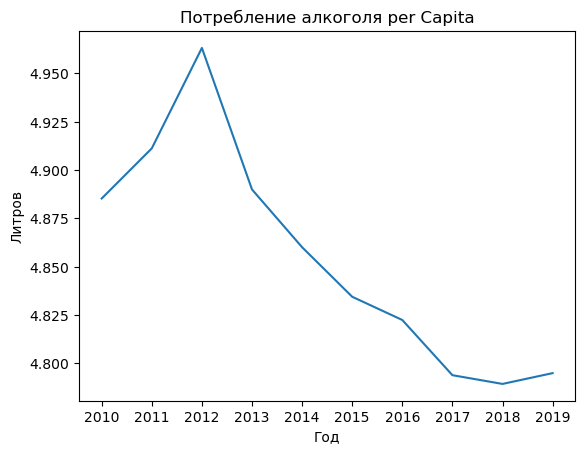

In [88]:
plt.plot(df_alch.mean()[::-1])
plt.title('Потребление алкоголя per Capita')
plt.xlabel('Год')
plt.ylabel('Литров')
plt.savefig('потребление акоголя per capita.png')
plt.show()

Заметим, что потребление мало меняется во времени. Тогда в качестве прогноза на 2021 год (данные на которые мы не нашли) возьмем среднее за последние 3 года (2017-2019).

In [89]:
df_alch['alch_con'] = df_alch[['2019', '2018', '2017']].mean(axis=1)
df_alch

C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\1434965039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alch['alch_con'] = df_alch[['2019', '2018', '2017']].mean(axis=1)


,Country,Alcohol,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,alch_con
0,Afghanistan,All types,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.010000
1,Albania,All types,4.40,4.44,4.39,4.38,4.33,4.10,4.28,4.43,5.03,4.88,4.410000
2,Algeria,All types,0.59,0.59,0.58,0.58,0.55,0.54,0.50,0.43,0.40,0.35,0.586667
3,Andorra,All types,10.99,10.72,11.18,11.18,11.02,9.88,10.06,10.33,10.46,10.53,10.963333
4,Angola,All types,5.84,6.15,6.16,6.09,6.53,8.10,7.67,7.83,7.66,7.58,6.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Venezuela (Bolivarian Republic of),All types,2.51,2.64,3.35,4.13,6.21,6.60,6.84,6.80,6.88,7.40,2.833333
184,Viet Nam,All types,3.41,3.44,3.26,3.15,2.98,2.78,2.68,2.57,2.46,2.26,3.370000
185,Yemen,All types,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.06,0.020000
186,Zambia,All types,3.82,3.70,3.61,3.52,3.50,4.22,2.98,2.78,2.79,2.79,3.710000


Повторим эти же действия для переменной Vine.

In [90]:
df_vine = df_alch_main[df_alch_main['Alcohol'] == 'Wine']
df_vine.reset_index(inplace=True)
df_vine.drop(columns=['index'], inplace=True)
df_vine['Country'] = df_alch['Country']
df_vine['vine_con'] = df_vine[['2019', '2018', '2017']].mean(axis=1)
df_vine

C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\3225028724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vine.drop(columns=['index'], inplace=True)
C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\3225028724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vine['Country'] = df_alch['Country']
C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\3225028724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Country,Alcohol,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,vine_con
0,Afghanistan,Wine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
1,Albania,Wine,1.15,1.12,1.11,1.17,1.10,0.99,1.07,1.12,1.08,1.08,1.126667
2,Algeria,Wine,0.20,0.20,0.20,0.18,0.17,0.16,0.14,0.13,0.13,0.13,0.200000
3,Andorra,Wine,4.98,4.81,5.33,5.38,5.40,4.13,4.61,4.73,4.73,4.71,5.040000
4,Angola,Wine,0.72,0.64,0.59,0.73,1.10,1.14,0.89,0.90,0.85,0.85,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Venezuela (Bolivarian Republic of),Wine,0.01,0.01,0.01,0.01,0.01,0.05,0.06,0.09,0.10,0.10,0.010000
184,Viet Nam,Wine,0.02,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.020000
185,Yemen,Wine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
186,Zambia,Wine,0.04,0.04,0.05,0.05,0.05,0.05,0.02,0.01,0.01,0.01,0.043333


Посмотрим на гистограмму распределения потребления алкоголя и уберем выбросы.

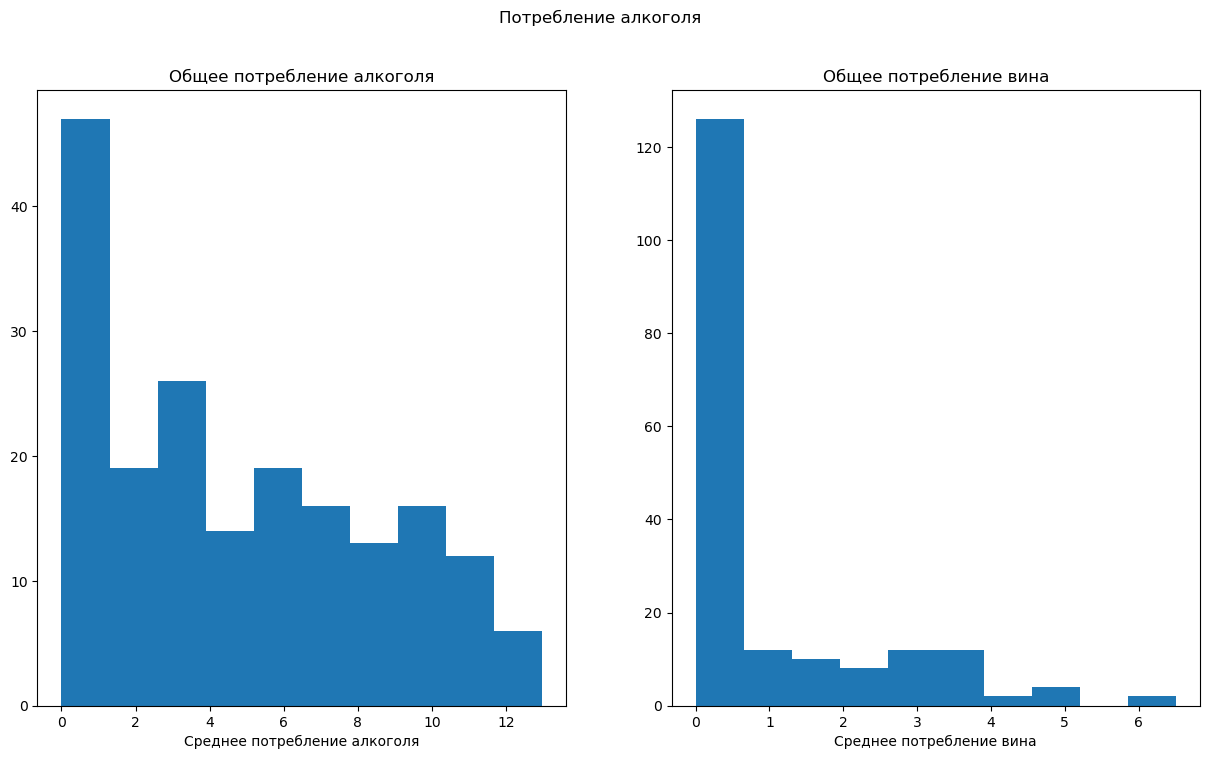

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Потребление алкоголя')

ax1.hist(df_alch['alch_con'])
ax1.set_title('Общее потребление алкоголя')
ax1.set_xlabel('Среднее потребление алкоголя')
plt.savefig('Общее потребление алкоголя.png')

ax2.hist(df_vine['vine_con'])
ax2.set_title('Общее потребление вина')
ax2.set_xlabel('Среднее потребление вина')
plt.savefig('Общее потребление вина.png')

plt.show()


Обрежем алкоголь до 8 литров в год и вино до 4 литров.

In [92]:
df_alch = df_alch[df_alch['alch_con'] < 8]
df_vine = df_vine[df_vine['vine_con'] < 4]

#### Рассмотрим основной датасет по IQ

In [93]:
df_main

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8791092


Уберем ненужные столбцы и пропуски.

In [94]:
df_main.drop(columns=['Rank','Population - 2023', 'HDI (2021)'], inplace=True)
df_main.rename({' Mean years of schooling - 2021': 'Mean years of schooling - 2021'}, inplace=True)
df_main.dropna(inplace=True)
df_main

,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Mean years of schooling - 2021,GNI - 2021
0,Japan,106.48,Asia,0.99,29,13.4,42274.0
2,Singapore,105.89,Asia,0.97,0,11.9,90919.0
3,Hong Kong,105.37,Asia,0.94,1,12.2,62607.0
4,China,104.10,Asia,0.96,8,7.6,17504.0
5,South Korea,102.35,Asia,0.98,0,12.5,44501.0
...,...,...,...,...,...,...,...
188,Gambia,52.68,Africa,0.58,0,4.6,2172.0
189,Guatemala,47.72,Central America,0.79,2,5.7,8723.0
190,Liberia,45.07,Africa,0.48,2,5.1,1289.0
191,Sierra Leone,45.07,Africa,0.48,0,4.6,1622.0


### Объединим датасеты

В обоих датасетах есть страны, но они называются по-разному. Посмотрим на симметричную разницу.

In [95]:
df_alch

,Country,Alcohol,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,alch_con
0,Afghanistan,All types,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.010000
1,Albania,All types,4.40,4.44,4.39,4.38,4.33,4.10,4.28,4.43,5.03,4.88,4.410000
2,Algeria,All types,0.59,0.59,0.58,0.58,0.55,0.54,0.50,0.43,0.40,0.35,0.586667
4,Angola,All types,5.84,6.15,6.16,6.09,6.53,8.10,7.67,7.83,7.66,7.58,6.050000
7,Armenia,All types,3.77,3.69,3.83,3.83,4.04,4.22,3.92,3.89,4.07,4.23,3.763333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Venezuela (Bolivarian Republic of),All types,2.51,2.64,3.35,4.13,6.21,6.60,6.84,6.80,6.88,7.40,2.833333
184,Viet Nam,All types,3.41,3.44,3.26,3.15,2.98,2.78,2.68,2.57,2.46,2.26,3.370000
185,Yemen,All types,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.06,0.020000
186,Zambia,All types,3.82,3.70,3.61,3.52,3.50,4.22,2.98,2.78,2.79,2.79,3.710000


In [96]:
set(df_main['Country'].values).symmetric_difference(set(df_alch['Country'].values))

{'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bolivia',
 'Bolivia (Plurinational State of)',
 'Brunei',
 'Brunei Darussalam',
 'Bulgaria',
 'Cabo Verde',
 'Canada',
 'Congo Republic',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Equatorial Guinea',
 'Estonia',
 'Federated States of Micronesia',
 'Finland',
 'France',
 'Germany',
 'Grenade',
 'Guinea-Bissau',
 'Hong Kong',
 'Hungary',
 'Iran',
 'Iran (Islamic Republic of)',
 'Ireland',
 'Japan',
 'Kiribati',
 'Laos',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Moldavia',
 'Montenegro',
 'Nauru',
 'Netherlands',
 'New Zealand',
 'Palestine',
 'Poland',
 'Portugal',
 'Republic of Korea',
 'Republic of Moldova',
 'Romania',
 'Russia',
 'Russian Federation',
 'Saint Lucia',
 'Samoa'

In [97]:
country_mapping = {
    "Bolivia (Plurinational State of)": "Bolivia",
    "Brunei Darussalam": "Brunei",
    "Czechia": "Czech Republic",
    "Democratic People's Republic of Korea": "North Korea",
    "Democratic Republic of the Congo": "Congo",
    "Iran (Islamic Republic of)": "Iran",
    "Lao People's Democratic Republic": "Laos",
    "Micronesia (Federated States of)": "Federated States of Micronesia",
    "Netherlands (Kingdom of the)": "Netherlands",
    "Republic of Korea": "South Korea",
    "Russian Federation": "Russia",
    "Syrian Arab Republic": "Syria",
    "Turkiye": "Turkey",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "United Republic of Tanzania": "Tanzania",
    "United States of America": "United States",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Viet Nam": "Vietnam",
    "Timor-Leste": "East Timor",
    "Cote d'Ivoire": "Ivory Coast",
}

Применим корректирующий словарь

In [98]:
df_alch['Country'] = df_alch['Country'].map(country_mapping).fillna(df_alch['Country'])
df_vine['Country'] = df_vine['Country'].map(country_mapping).fillna(df_vine['Country'])

C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\2369993033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alch['Country'] = df_alch['Country'].map(country_mapping).fillna(df_alch['Country'])
C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\2369993033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vine['Country'] = df_vine['Country'].map(country_mapping).fillna(df_vine['Country'])


Обьединим датасеты по алкоголю с основным датасетом.

In [99]:
df_merged = pd.merge(df_main, df_alch[['Country', 'alch_con']], on='Country', how='left')
df_merged = pd.merge(df_merged, df_vine[['Country', 'vine_con']], on='Country', how='left')

In [100]:
df_merged

,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Mean years of schooling - 2021,GNI - 2021,alch_con,vine_con
0,Japan,106.48,Asia,0.99,29,13.4,42274.0,NaN,0.360000
1,Singapore,105.89,Asia,0.97,0,11.9,90919.0,1.820000,0.280000
2,Hong Kong,105.37,Asia,0.94,1,12.2,62607.0,NaN,NaN
3,China,104.10,Asia,0.96,8,7.6,17504.0,4.833333,0.190000
4,South Korea,102.35,Asia,0.98,0,12.5,44501.0,7.596667,0.146667
...,...,...,...,...,...,...,...,...,...
177,Gambia,52.68,Africa,0.58,0,4.6,2172.0,2.650000,0.000000
178,Guatemala,47.72,Central America,0.79,2,5.7,8723.0,1.623333,0.046667
179,Liberia,45.07,Africa,0.48,2,5.1,1289.0,2.973333,0.286667
180,Sierra Leone,45.07,Africa,0.48,0,4.6,1622.0,3.213333,0.003333


## Рассмотрим имеющиеся данные

### Переменная Nobel Prices

Рассмотрим гисторамму переменной Nobel Prices.

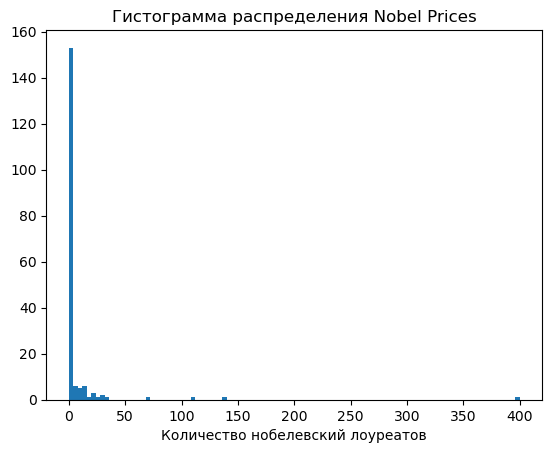

In [101]:
plt.hist(df_merged['Nobel Prices'], bins = 100)
plt.title('Гистограмма распределения Nobel Prices')
plt.xlabel('Количество нобелевский лоуреатов')
plt.savefig('Гистограмма распределения Nobel Prices.png')
plt.show()

Видно, что данная переменная в подавляющем количестве случае равна нулю, однако существуют страны выбросы с 400 нобелевским лауреатами. Посмотрим, в какой стране.

In [102]:
df_merged[['Country','Nobel Prices']][df_merged['Nobel Prices'] > 350]

,Country,Nobel Prices
24,United States,400


Ничего удивительного. Однако для исследования такое распределение кажется неудобным. Сделаем из него просто бинарную переменную.

In [103]:
df_merged['Nobel_Dummy'] = (df_merged['Nobel Prices'] > 0).astype(int)

### Переменная Mean years of schooling

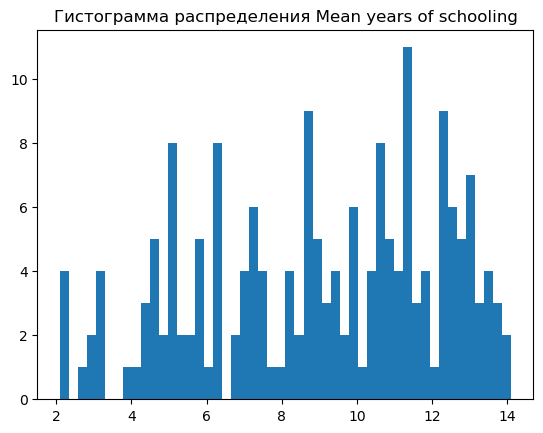

In [104]:
plt.hist(df_merged['Mean years of schooling - 2021'], bins=50)
plt.title('Гистограмма распределения Mean years of schooling')
plt.savefig('Гистограмма распределения Mean years of schooling.png')
plt.show()

Данная переменная представлена полимодальным распределением на промежутке от 2 до 14. Интересное наблюдение: в целом медианы склонны выпадать на середины интервалов, то есть на нечетные числа. То есть в стране в среднем люди учатся скорее 5, 7, 9, 11, 13 лет. Это весьма известный факт, что в разных странах принята разная продолжительность образования. А как оно распределено по континентам?

In [105]:
df_merged = df_merged[df_merged['Mean years of schooling - 2021'] > 4]

In [106]:
df_merged[['Continent', 'Mean years of schooling - 2021']].groupby('Continent').mean()

,Mean years of schooling - 2021
Continent,
Africa,6.561905
Asia,9.411905
Central America,9.031579
Europe,12.195122
Europe/Asia,11.400000
North America,12.233333
Oceania,9.087500
South America,9.575000


Самая высокая средняя продолжительность учебы наблюдается в Европе, Азии и Северной Америке. Самая короткая- Африка, Океания и Южная Америка, то есть в странах с низким ВНД на душу населения. А нет ли взаимосвязи между средней продолжительностью образования и уровень доходов?

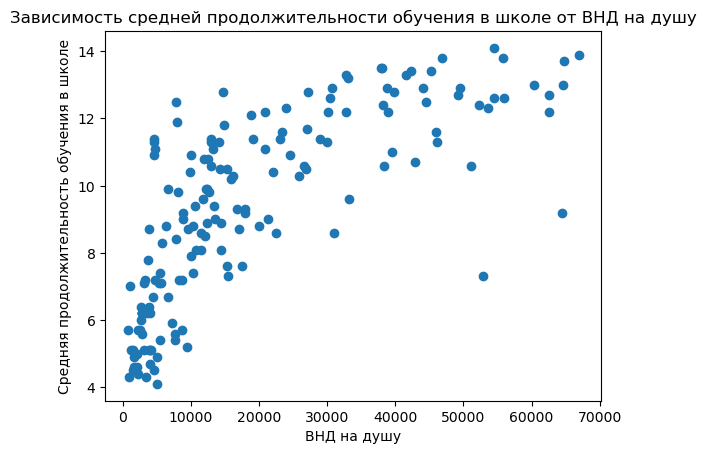

In [107]:
cond = df_merged[' GNI - 2021'] < 75000
plt.scatter(df_merged[' GNI - 2021'][cond], df_merged['Mean years of schooling - 2021'][cond])
plt.title('Зависимость средней продолжительности обучения в школе от ВНД на душу')
plt.ylabel('Cредняя продолжительность обучения в школе')
plt.xlabel('ВНД на душу')
plt.show()

Ограничим значения ВНД до 75к для лучшего отображения.

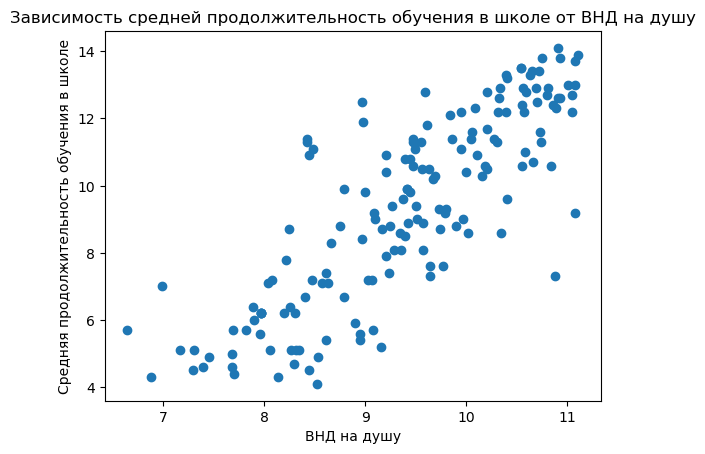

In [108]:
cond = df_merged[' GNI - 2021'] < 75000
plt.scatter(np.log(df_merged[' GNI - 2021'][cond]), df_merged['Mean years of schooling - 2021'][cond])
plt.title('Зависимость средней продолжительность обучения в школе от ВНД на душу')
plt.ylabel('Cредняя продолжительность обучения в школе')
plt.xlabel('ВНД на душу')
plt.show()

C:\Users\vovar\AppData\Local\Temp\ipykernel_23932\3046076595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['ln_GNI'] = np.log(df_merged[' GNI - 2021'])


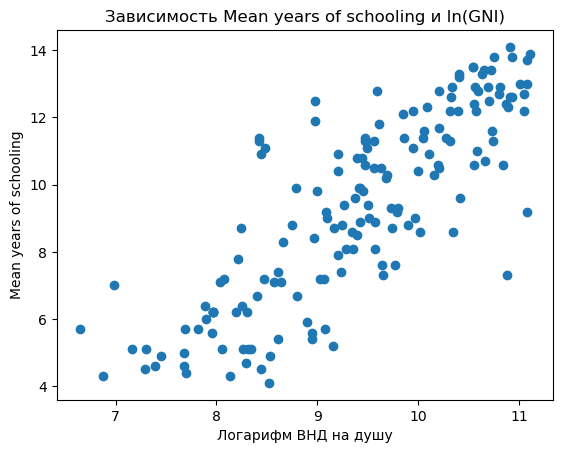

In [109]:
df_merged['ln_GNI'] = np.log(df_merged[' GNI - 2021'])
cond = df_merged['ln_GNI'] < np.log(75000)  # Условие теперь применяется к логарифмированному GNI
plt.scatter(df_merged['ln_GNI'][cond], df_merged['Mean years of schooling - 2021'][cond])
plt.title('Зависимость Mean years of schooling и ln(GNI)')
plt.xlabel('Логарифм ВНД на душу')
plt.ylabel('Mean years of schooling')
plt.savefig('Зависимость средней продолжительности обучения в школе от логарифма ВНД на душу населения.png')
plt.show()

Можно заметить положительную взаимосвязь между уровнем доходов в экономике и средней продолжительность учебы. Однако это связь нелинейна. ВНД на душу возьмем под логарифмом. Оставим данные по ВНД ниже 75к.

In [110]:
df_merged = df_merged[df_merged[' GNI - 2021'] < 750000]

### Рассмотрим переменную GNI

Это аналог переменной ВНД на душу населения. Здесь интересно рассмотреть, как этот параметр связан с потреблением алкоголя, поскольку, как известно в экономической теории, алкоголь в целом является инфериорным благом, то есть с ростом дохода его количество снижается (однако вино- исключение).

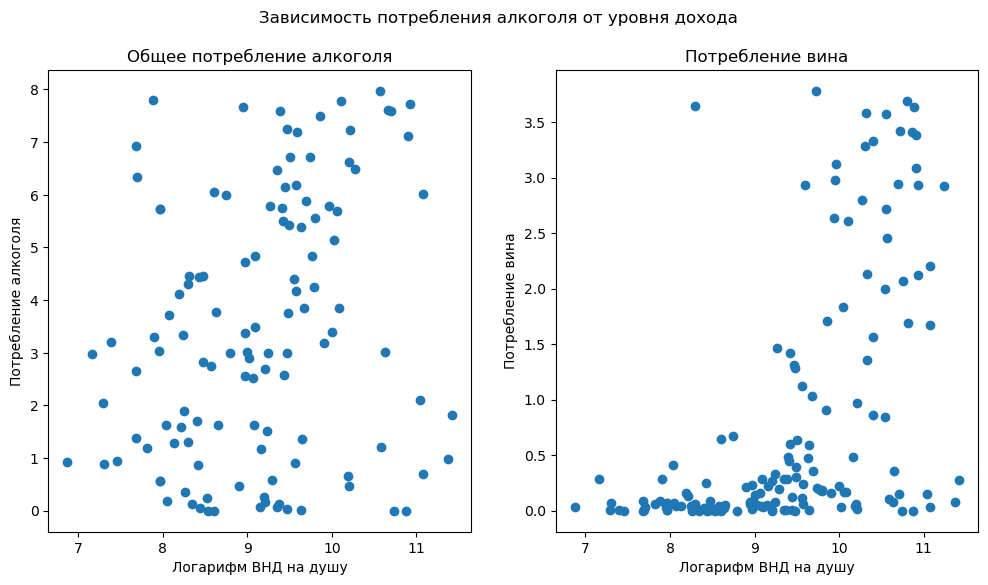

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Зависимость потребления алкоголя от уровня дохода')

ax1.scatter(df_merged['ln_GNI'], df_merged['alch_con'])
ax1.set_title('Общее потребление алкоголя')
ax1.set_xlabel('Логарифм ВНД на душу')
ax1.set_ylabel('Потребление алкоголя')

ax2.scatter(df_merged['ln_GNI'], df_merged['vine_con'])
ax2.set_title('Потребление вина') 
ax2.set_xlabel('Логарифм ВНД на душу')
ax2.set_ylabel('Потребление вина')
plt.savefig('Зависимость потребления алкоголя от уровня дохода.png')

plt.show()

Явную зависимость проследить не получается, но можно заметить, что страны с более высоким уровнем ВНД на душу склонны потреблять больше вина.

### Рассмотрим literacy rate

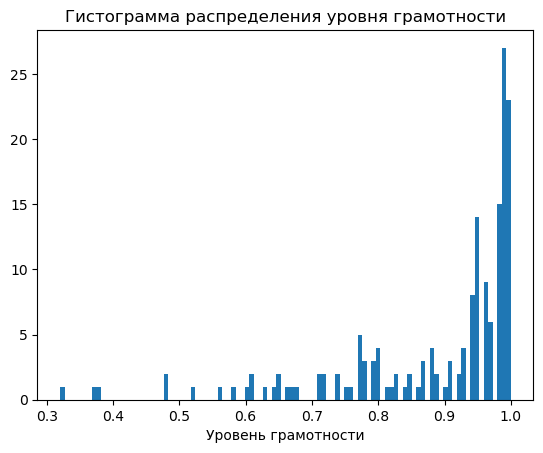

,Country,Literacy Rate
173,South Sudan,0.32


In [112]:
plt.hist(df_merged['Literacy Rate'], bins = 100)
plt.title('Гистограмма распределения уровня грамотности')
plt.xlabel('Уровень грамотности')
plt.savefig('Уровень грамотности.png')
plt.show()
df_merged[['Country', 'Literacy Rate']][df_merged['Literacy Rate'] == np.min(df_merged['Literacy Rate']) ]

### Рассмотрим переменную Average IQ

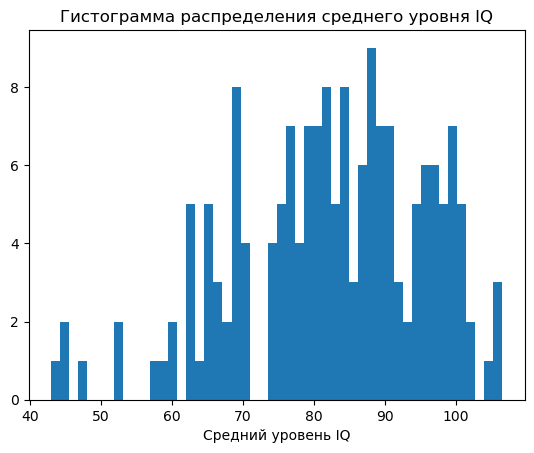

In [113]:
plt.hist(df_merged['Average IQ'], bins=50)
plt.title('Гистограмма распределения среднего уровня IQ')
plt.xlabel('Средний уровень IQ')
plt.savefig('Средний уровень IQ.png')
plt.show()

In [114]:
std = np.std(df_merged['Average IQ'])
m = np.mean(df_merged['Average IQ'])
print(f'std = {std}')
print(f'mean = {m}')

std = 13.338908613785474
mean = 82.39358823529412


Распределение напоминает нормальное. Проверим гипотезу о нормальности распределения на основании теста Колмогорова-Смирнова.

In [115]:
alpha = 0.05

stat, p = kstest(df_merged['Average IQ'], 'norm')
print('Статистика теста: {:.3f}, p-значение: {:.3f}'.format(stat, p))

if p > alpha:
    print('Выборка похожа на нормально распределенную (не отклоняем H0)')
else:
    print('Выборка не похожа на нормально распределенную (отклоняем H0)')

Статистика теста: 1.000, p-значение: 0.000
Выборка не похожа на нормально распределенную (отклоняем H0)


## Экономическая модель

Удалим пропущенные значения.

In [116]:
df_merged.dropna(inplace=True)

Посмотрим сколько осталось наблюдений после удаления пропусков и выбросов.

In [117]:
df_merged.reset_index()

,index,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Mean years of schooling - 2021,GNI - 2021,alch_con,vine_con,Nobel_Dummy,ln_GNI
0,1,Singapore,105.89,Asia,0.97,0,11.9,90919.0,1.820000,0.280000,0,11.417724
1,3,China,104.10,Asia,0.96,8,7.6,17504.0,4.833333,0.190000,1,9.770185
2,4,South Korea,102.35,Asia,0.98,0,12.5,44501.0,7.596667,0.146667,0,10.703267
3,12,Cambodia,99.75,Asia,0.78,0,5.1,4079.0,4.460000,0.020000,0,8.313607
4,21,Iceland,98.26,Europe,0.99,1,13.8,55782.0,7.730000,2.120000,1,10.929207
...,...,...,...,...,...,...,...,...,...,...,...,...
115,177,Gambia,52.68,Africa,0.58,0,4.6,2172.0,2.650000,0.000000,0,7.683404
116,178,Guatemala,47.72,Central America,0.79,2,5.7,8723.0,1.623333,0.046667,1,9.073718
117,179,Liberia,45.07,Africa,0.48,2,5.1,1289.0,2.973333,0.286667,1,7.161622
118,180,Sierra Leone,45.07,Africa,0.48,0,4.6,1622.0,3.213333,0.003333,0,7.391415


119 наблюдений нормально для регрессии по странам.

## Построение регрессии

In [118]:
X = df_merged[['Literacy Rate', 'Mean years of schooling - 2021', 'vine_con', 'ln_GNI', 'Nobel_Dummy', 'alch_con']]

Y = df_merged['Average IQ']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

residuals = model.resid

### Проверка выполнения предпосылок ТГМ

In [119]:
# Порог значимости
alpha = 0.05

# Флаг для проверки нарушения ТГМ
tgm_violated = False

# 1. Проверка мультиколлинеарности (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 2. Проверка на гомоскедастичность (тест Бройша-Пагана)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model.model.exog)
print('Breusch-Pagan test -- p-value:', bp_test[1])
if bp_test[1] < alpha:
    print("Отклоняем нулевую гипотезу о гомоскедастичности (есть гетероскедастичность)")
    tgm_violated = True
else:
    print("Не отклоняем нулевую гипотезу (нет гетероскедастичности)")

# 3. Проверка на некоррелированность ошибок (тест Дарбина-Уотсона)
dw_test = durbin_watson(residuals)
print('Durbin-Watson test:', dw_test)

# 4. Проверка на нормальное распределение остатков (тест Шапиро-Уилка)
shapiro_test = shapiro(residuals)
print('Shapiro-Wilk test -- p-value:', shapiro_test[1])
if shapiro_test[1] < alpha:
    print("Отклоняем нулевую гипотезу о нормальности распределения остатков")
    tgm_violated = True
else:
    print("Не отклоняем нулевую гипотезу (остатки распределены нормально)")

# Вывод о нарушении ТГМ
if tgm_violated:
    print("\nТГМ нарушается")
else:
    print("\nТГМ не нарушается")

                          feature         VIF
0                           const  137.246493
1                   Literacy Rate    2.919203
2  Mean years of schooling - 2021    3.794387
3                        vine_con    1.438464
4                          ln_GNI    2.697389
5                     Nobel_Dummy    1.045243
6                        alch_con    1.441237
Breusch-Pagan test -- p-value: 0.07870672488264438
Не отклоняем нулевую гипотезу (нет гетероскедастичности)
Durbin-Watson test: 0.8509633820849846
Shapiro-Wilk test -- p-value: 0.09568266570568085
Не отклоняем нулевую гипотезу (остатки распределены нормально)

ТГМ не нарушается


In [120]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Average IQ   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     15.01
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.44e-12
Time:                        23:50:04   Log-Likelihood:                -436.57
No. Observations:                 120   AIC:                             887.1
Df Residuals:                     113   BIC:                             906.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Уровень интеллектуальных способностей зависит от уровня благосостояния населения, уровня грамотности: 
Мы можем сделать вывод, что нет оснований отвергать основную гипотезу. Уровень интеллектуальных способностей зависит от уровня благосостояния населения и уровня грамотности. Это значит, что: 1) при увеличении уровня благосостояния населения (ln_GNI) на 1% можно ожидать улучшения или изменения IQ на 0,030983 ; 2) при увеличении уровня грамотности (Literacy Rate) на 1%  можно ожидать улучшения или изменения IQ на 0,306662.

Наличие хотя бы одного нобелевского лауреата повышает общий уровень интеллектуальных способностей:
Мы можем сделать вывод, что основная гипотеза отвергается. Наличие хотя бы одного нобелевского лауреата НЕ повышает общий уровень интеллектуальных способностей. Это значит, что статистически нет взаимосвязи между наличием нобелевских лауреатов и IQ.

Потребление вина оказывает положительное влияние на интеллектуальные способности человека:
Следовательно, мы можем сделать вывод, что основная гипотеза отвергается. Это значит, что потребление вина НЕ оказывает положительное влияние на интеллектуальные способности человека (IQ).